In [6]:
from funs import calculate_time_domain_features_all_in_folder, ACTIVITIES
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from matplotlib import pyplot as plt


import pandas as pd

print(ACTIVITIES)

['idle', 'stairs', 'walking', 'running']


In [10]:
dfs = []

for activity_num in range(len(ACTIVITIES)):

    activity_name = ACTIVITIES[activity_num]
    temp_df = calculate_time_domain_features_all_in_folder(activity_name, activity_num)
    dfs.append(temp_df)

In [11]:
df = pd.concat(dfs, ignore_index=True)
df.shape

(6462, 22)

mean_X


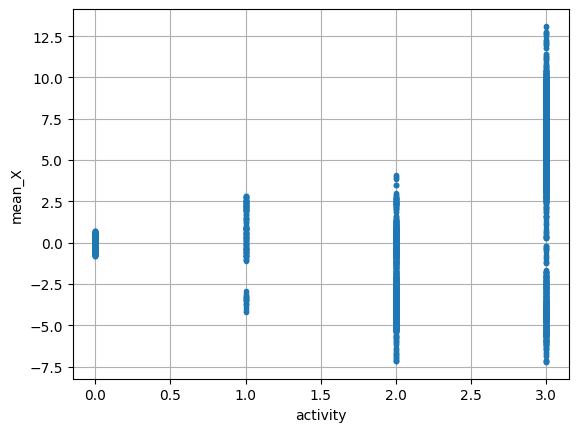

mean_Y


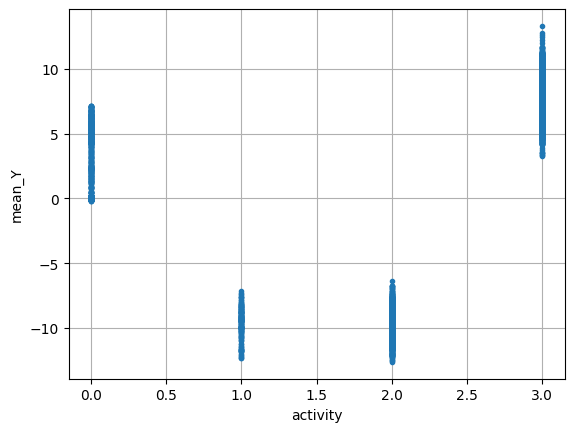

mean_Z


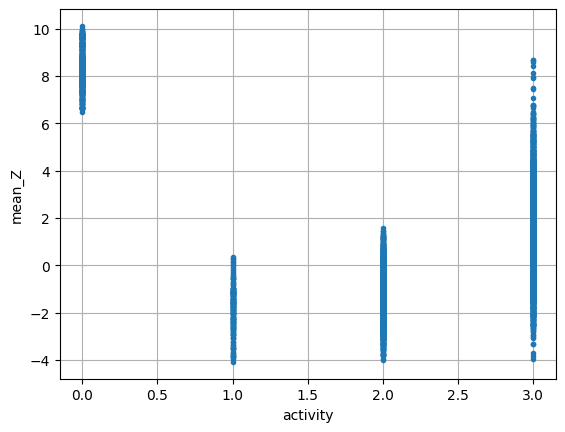

variance_X


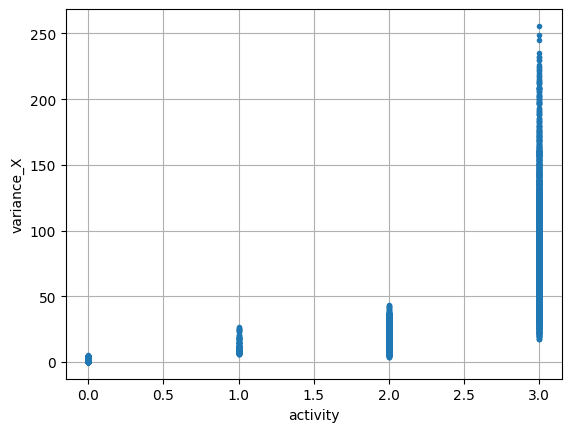

variance_Y


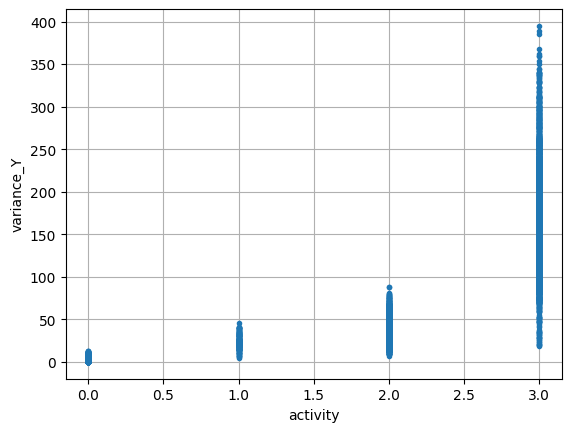

variance_Z


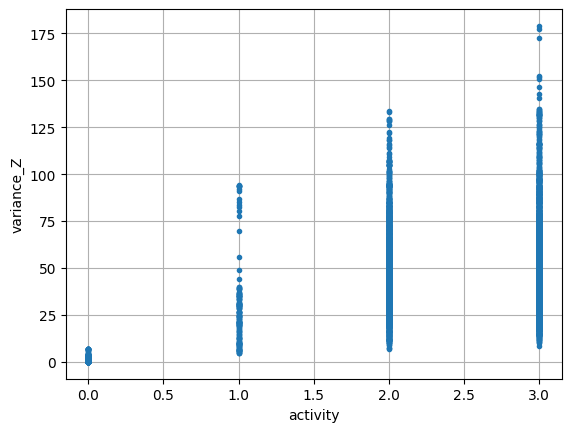

standard_deviation_X


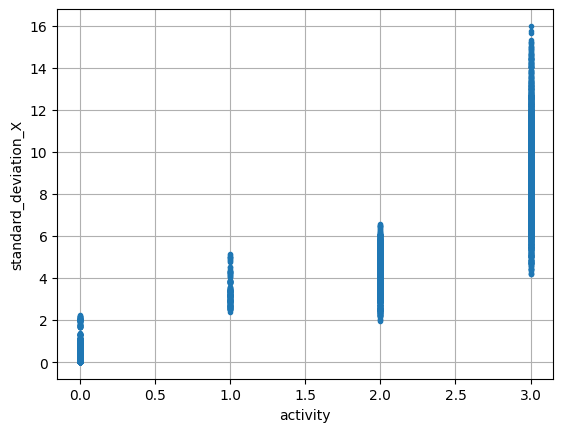

standard_deviation_Y


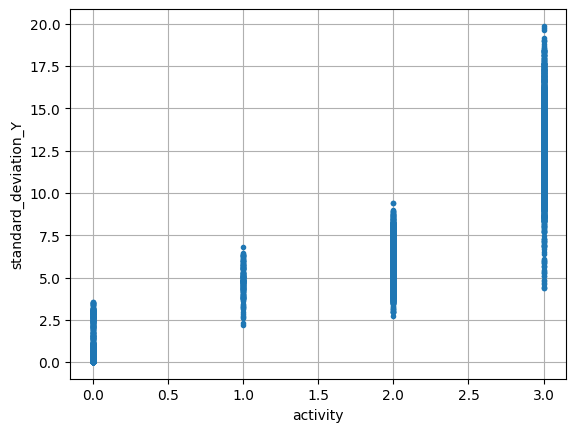

standard_deviation_Z


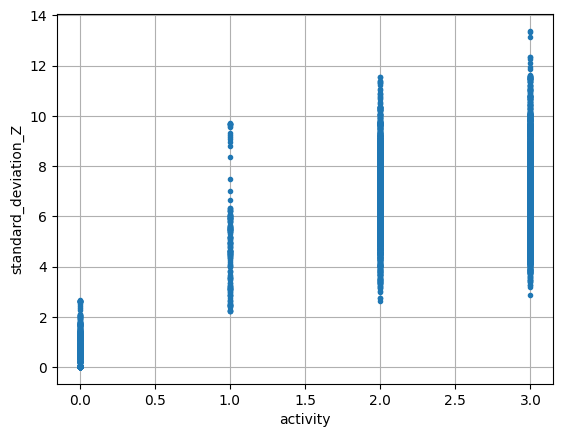

median_X


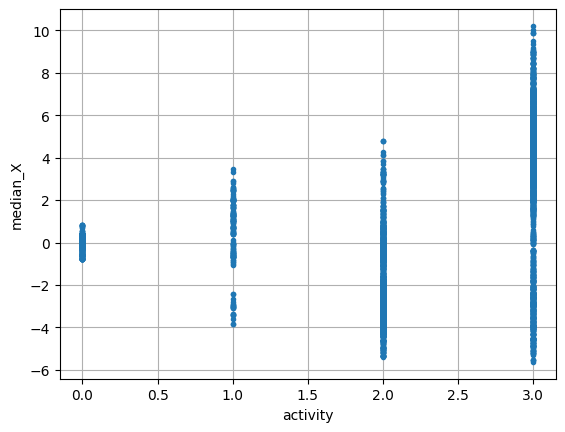

median_Y


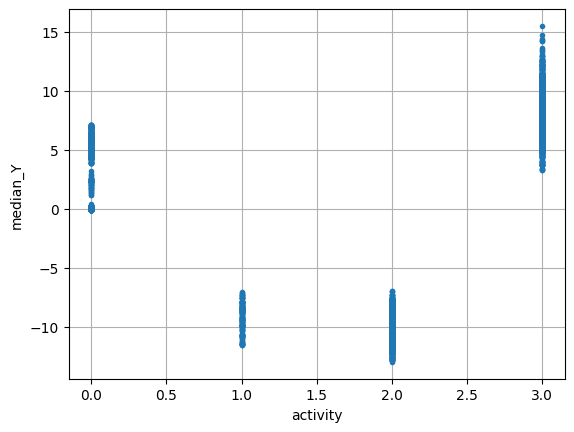

median_Z


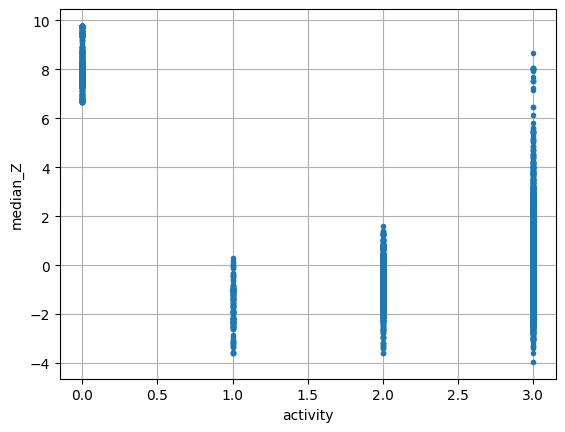

max_X


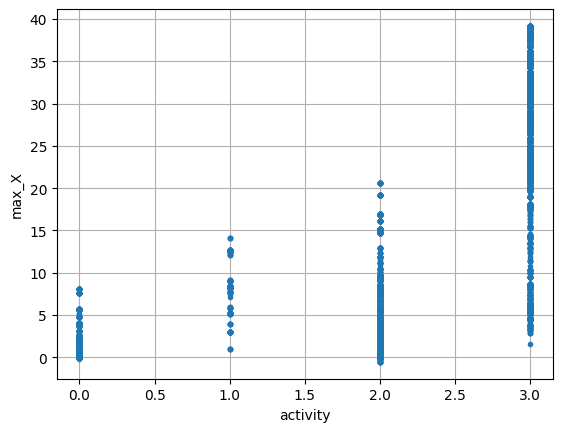

max_Y


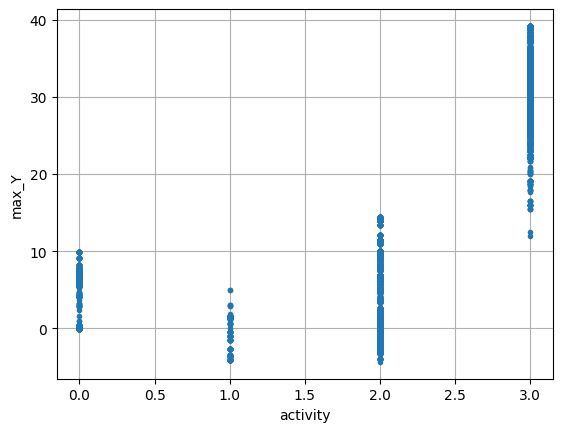

max_Z


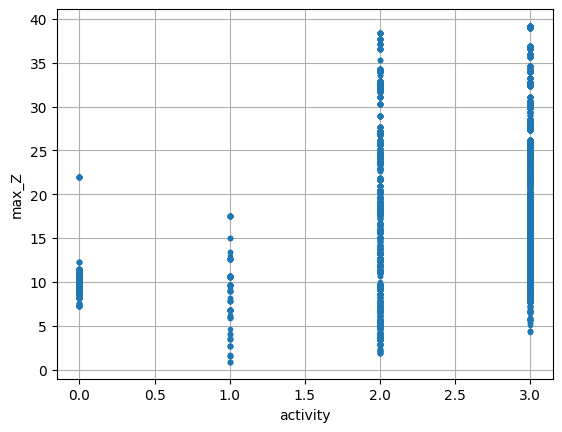

min_X


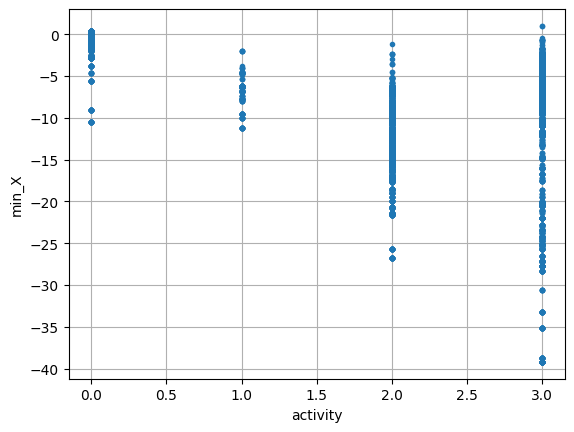

min_Y


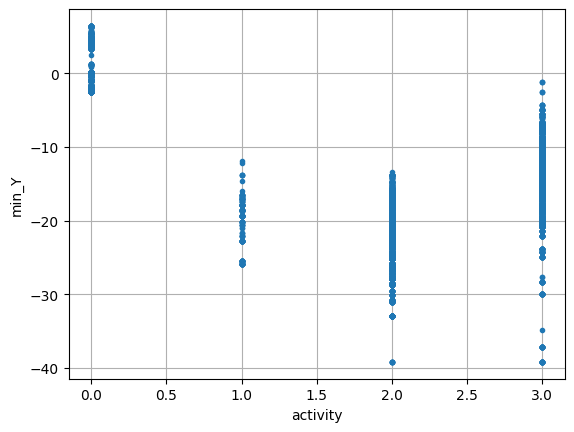

min_Z


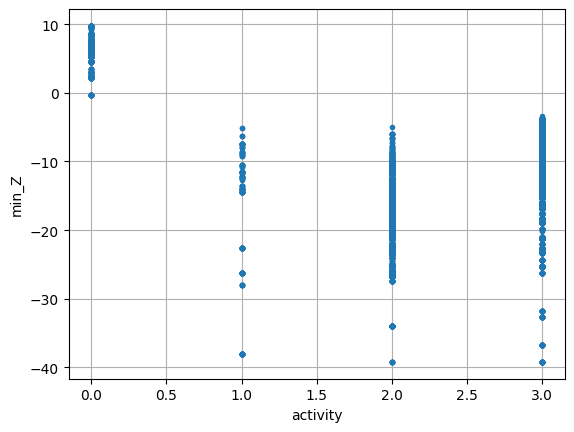

rms_X


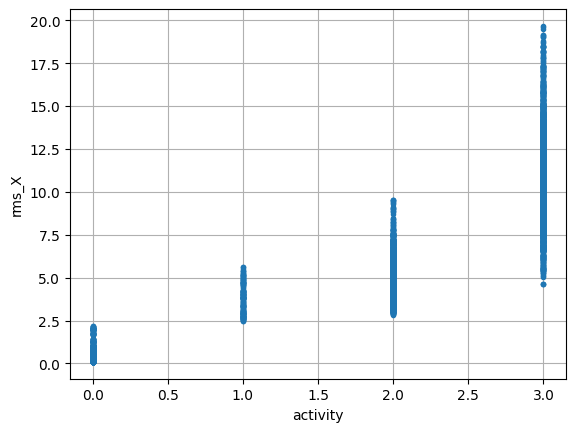

rms_Y


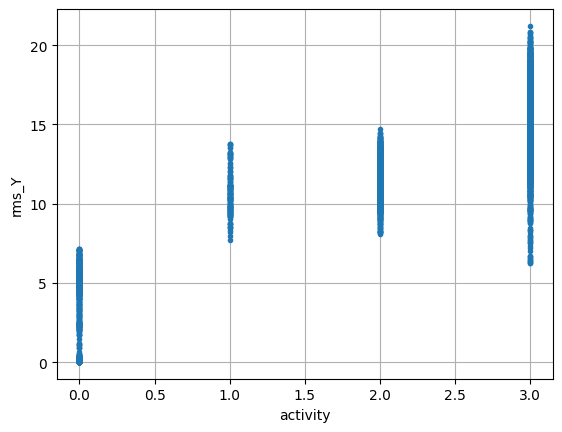

rms_Z


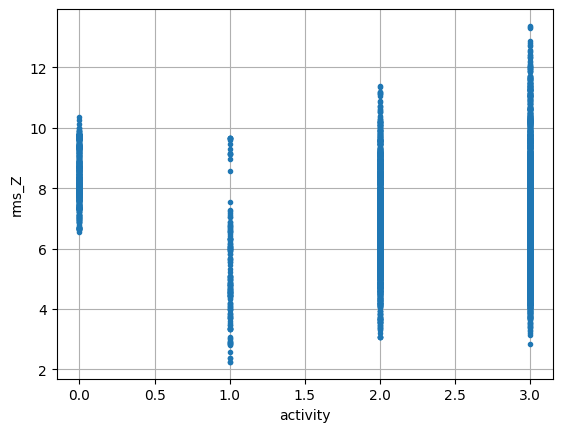

In [12]:
for column in df.columns[0:-1]:
    print(column)
    plt.plot(df["activity"], df[column], ".")
    plt.grid(True)
    plt.xlabel("activity")
    plt.ylabel(f"{column}")
    plt.show()

In [13]:
all_columns = df.columns
corr = df[all_columns[0:-1]].corrwith(df[all_columns[-1]])
print(corr)

mean_X                  0.459073
mean_Y                  0.404181
mean_Z                 -0.620093
variance_X              0.723707
variance_Y              0.755924
variance_Z              0.575508
standard_deviation_X    0.881413
standard_deviation_Y    0.896077
standard_deviation_Z    0.755308
median_X                0.441294
median_Y                0.400196
median_Z               -0.732748
max_X                   0.728442
max_Y                   0.765623
max_Z                   0.379921
min_X                  -0.376276
min_Y                  -0.509039
min_Z                  -0.576918
rms_X                   0.879597
rms_Y                   0.893485
rms_Z                  -0.351794
dtype: float64


In [14]:
choosen_features = ["mean_X", "mean_Z", "variance_X", "variance_Z", "max_Z", "rms_Z", "activity"]
df_choosen_features = df[choosen_features]

In [15]:
df_shuffled = shuffle(df_choosen_features, random_state=1)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["activity"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13)

In [17]:
print(X_train.shape)
print(y_train.shape)

(3877, 6)
(3877,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(2585, 6)
(2585,)


mean_X


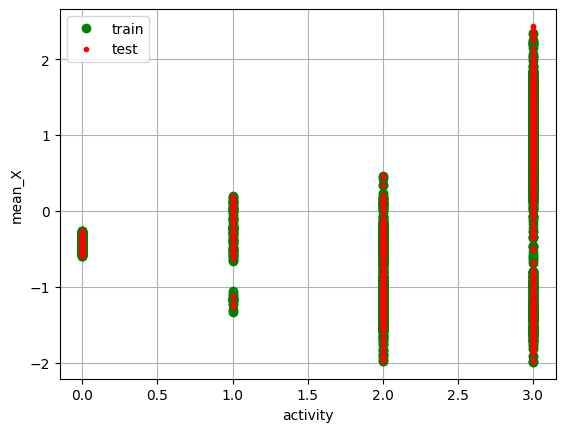

mean_Z


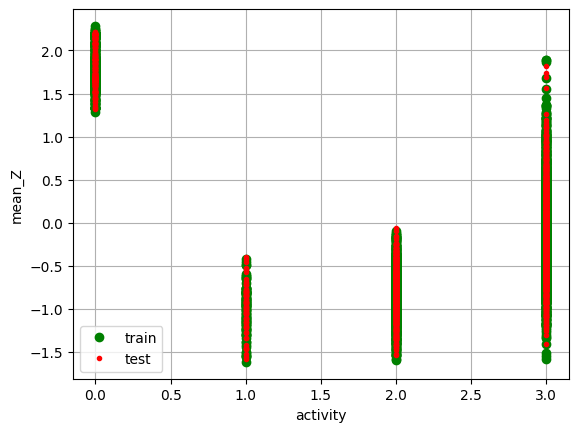

variance_X


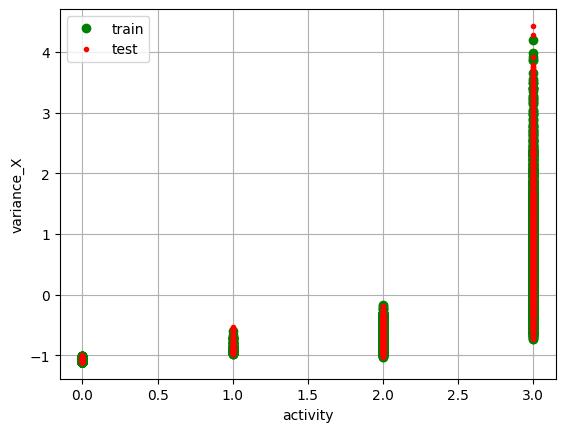

variance_Z


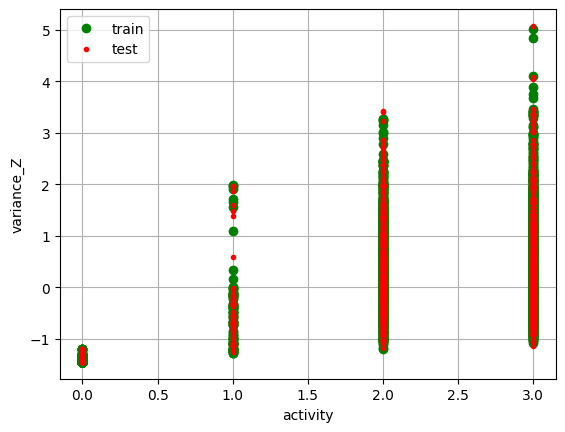

max_Z


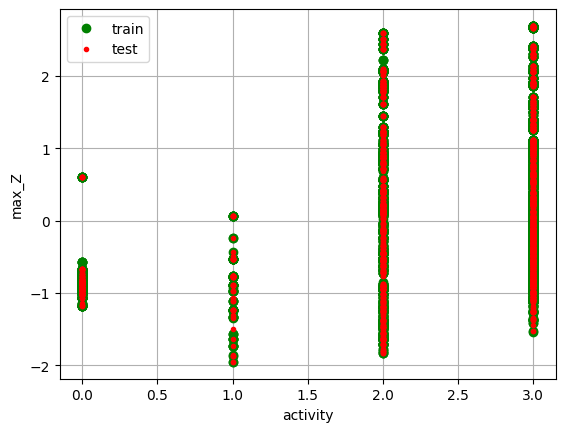

rms_Z


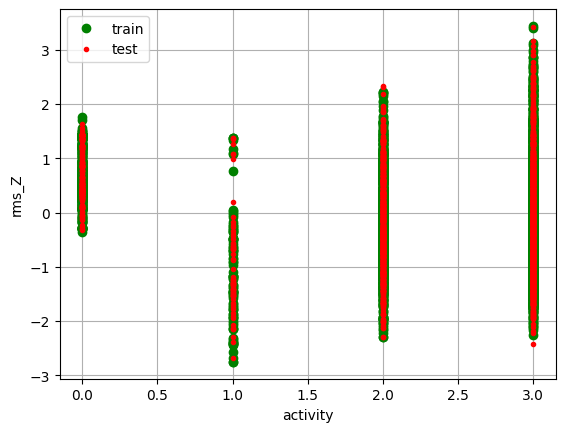

In [19]:
for i in range(X_train.shape[1]):
    column = choosen_features[i]
    print(column)
    plt.plot(y_train, X_train[:, i], "go")
    plt.plot(y_test, X_test[:, i], "r.")
    plt.grid(True)
    plt.xlabel("activity")
    plt.ylabel(f"{column}")
    plt.legend(["train", "test"])
    plt.show()

In [20]:
clf_svm = svm.SVC(C=1, kernel='rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1)

In [21]:
clf_svm.score(X_train, y_train)

0.9863296363167398

In [22]:
clf_svm.score(X_test, y_test)

0.9833655705996132

In [23]:
clf_rf = RandomForestClassifier(n_estimators=12, criterion='entropy', max_depth=10, random_state=13)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=12,
                       random_state=13)

In [24]:
clf_rf.score(X_train, y_train)

0.9979365488779984

In [25]:
clf_rf.score(X_test, y_test)

0.9903288201160542

Wyniki w obydwu przypadkach modeli są porównywalne. Wybrane cechy wydają się być wystarczające do wytrenowania klasyfikatorów ruchu.